#Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix,ConfusionMatrixDisplay
import pickle

#Load the Dataset 

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\loan\loan_approval_data.csv')
df.head(3)              

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y


#Checking shape and basic information of the dataset

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [5]:
df.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


#Dropping unnecessary columns

In [6]:
df.drop(['loan_id', 'gender', 'education'], axis=1, inplace=True)
df.head(3)

,married,dependents,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,no,0.0,no,5849,0.0,NaN,360.0,1.0,urban,y
1,yes,1.0,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,yes,0.0,yes,3000,0.0,66.0,360.0,1.0,urban,y


#Handeling missing values 

In [7]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
married               3
dependents           15
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64


In [8]:

df['dependents'].fillna(df['dependents'].mode()[0],inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0],inplace=True)
df['loanamount'].fillna(df['loanamount'].mean(),inplace=True)
df['loan_amount_term'].fillna(df['loan_amount_term'].mode()[0],inplace=True)
df['credit_history'].fillna(df['credit_history'].mode()[0],inplace=True)
df['married'].fillna(df['married'].mode()[0],inplace=True)

In [9]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
married              0
dependents           0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64


In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

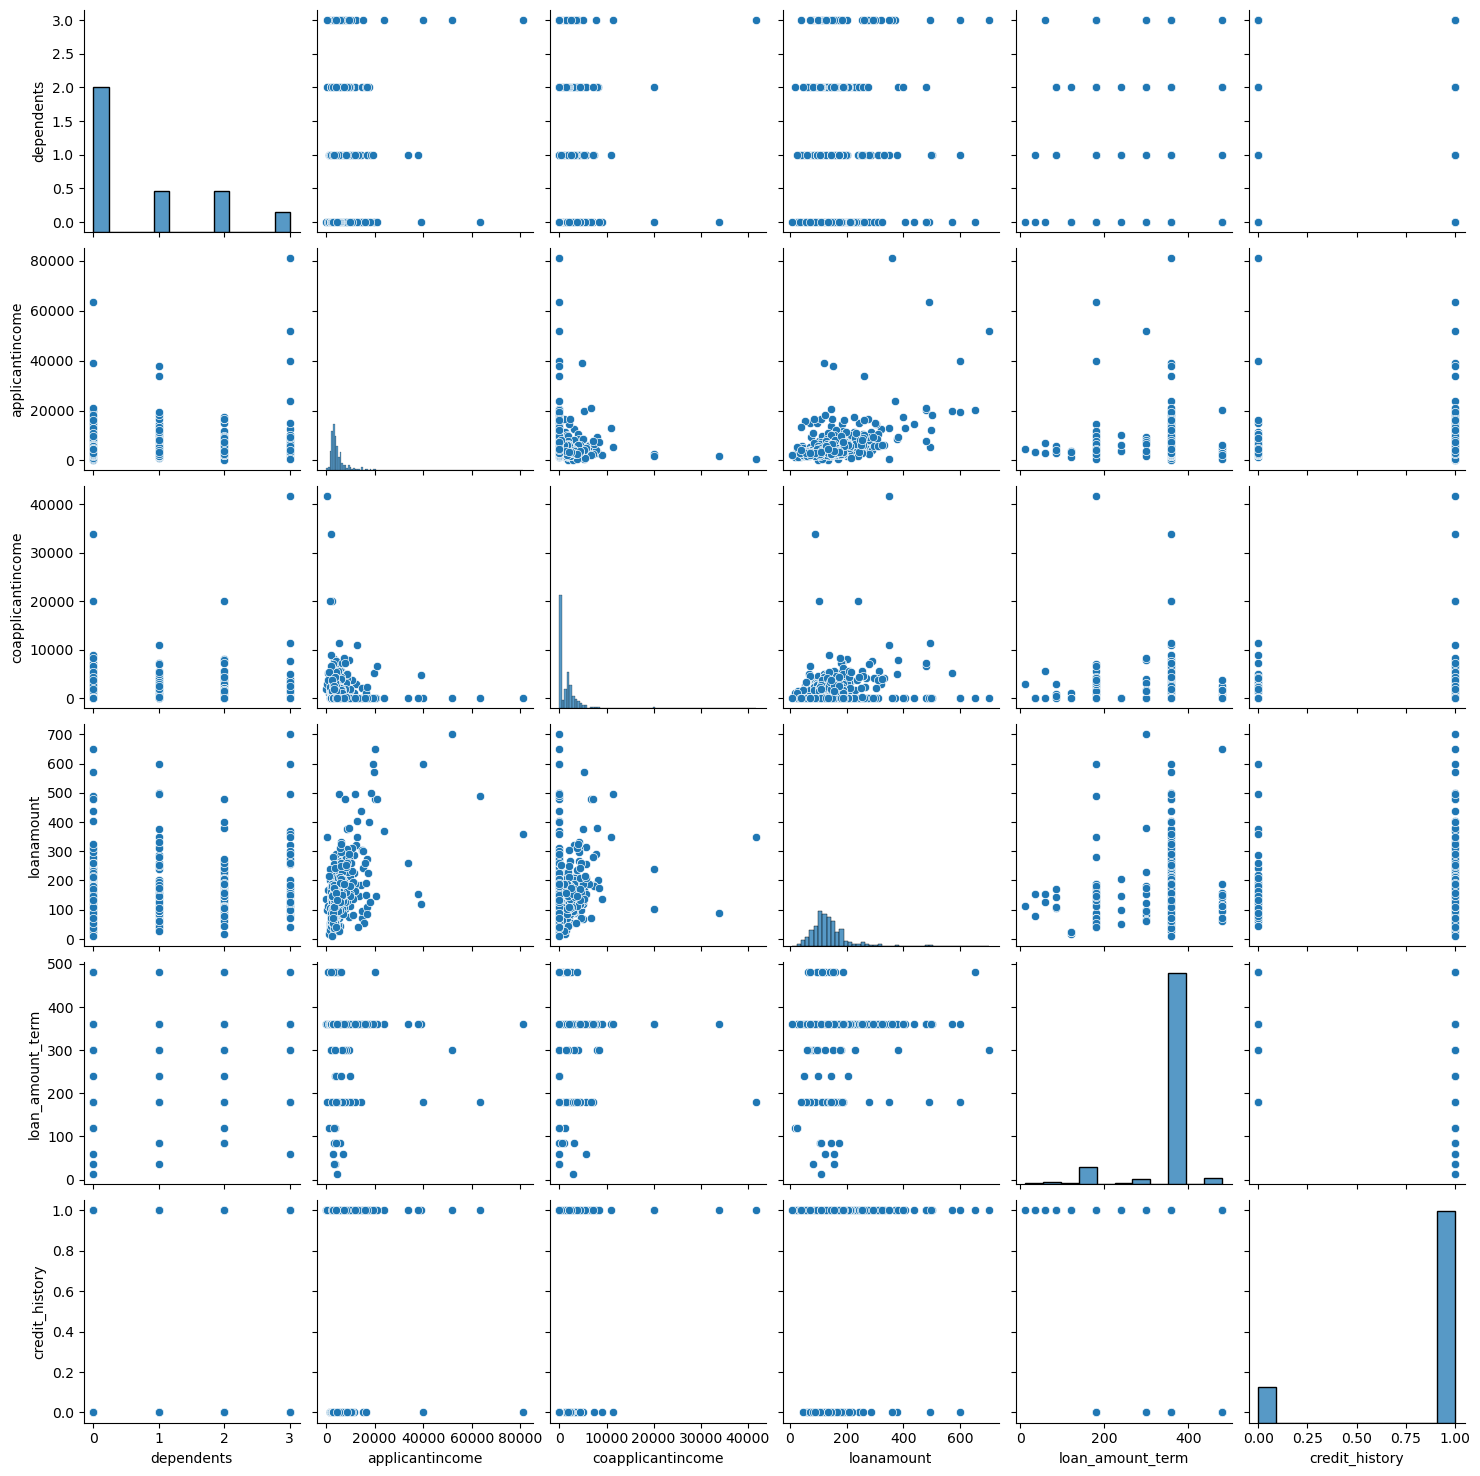

In [12]:
sns.pairplot(df)

In [13]:
categorial_features = df.select_dtypes(include=[np.object_])
categorial_features.columns

Index(['married', 'self_employed', 'property_area', 'loan_status'], dtype='object')

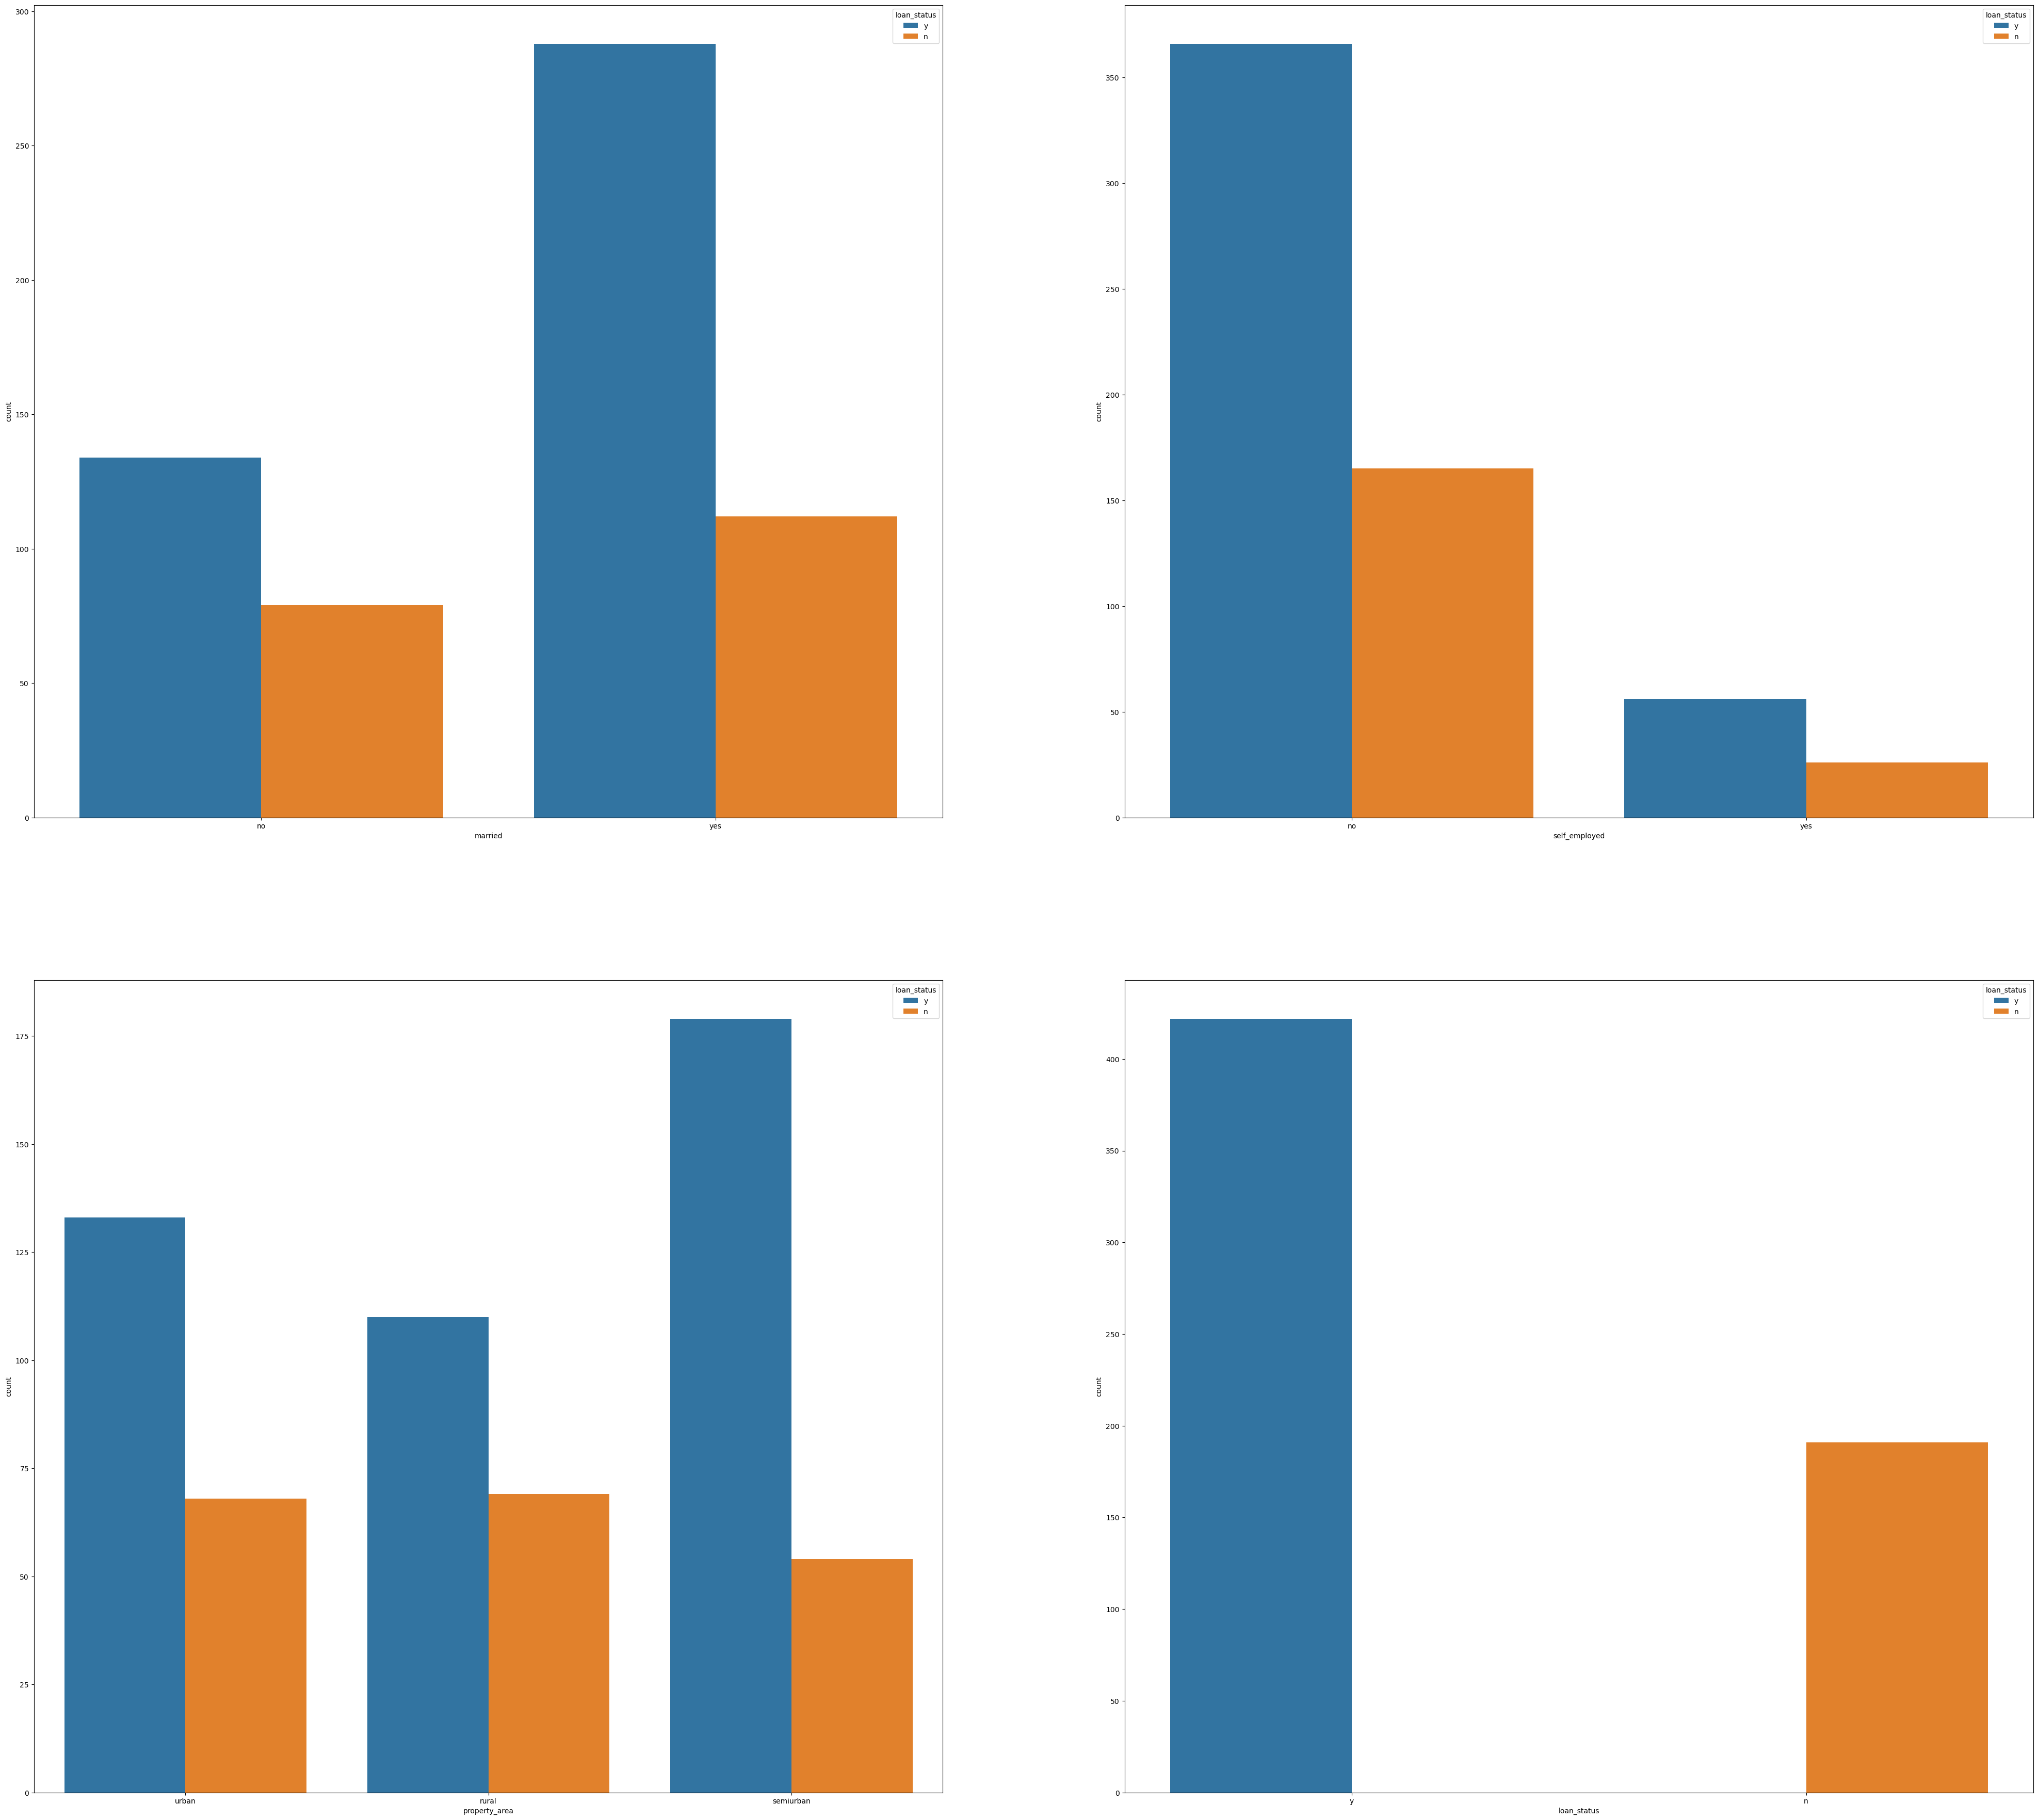

In [14]:
i = 1
plt.figure(figsize = (50,45))

for feature in categorial_features:
    plt.subplot(2,2,i)
    sns.countplot(x = feature, hue = 'loan_status', data=df)
    i += 1

#Conclusion: 

In [15]:
df['married'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
df['self_employed'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df['property_area'].unique()

array(['urban', 'rural', 'semiurban'], dtype=object)

In [18]:
df['loan_status'].unique()

array(['y', 'n'], dtype=object)

In [19]:
df['married'] = df['married'].replace({'yes':0, 'no':1})
df['self_employed'] = df['self_employed'].replace({'yes':0, 'no':1})
df['property_area'] = df['property_area'].replace({'urban':0, 'rural':1, 'semiurban':2})
df['loan_status'] = df['loan_status'].replace({'y':0, 'n':1})

In [20]:
df.head(3)

,married,dependents,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0.0,1,5849,0.0,146.412162,360.0,1.0,0,0
1,0,1.0,1,4583,1508.0,128.000000,360.0,1.0,1,1
2,0,0.0,0,3000,0.0,66.000000,360.0,1.0,0,0


#Seprating target and indipendent feature 

In [21]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(490, 9) (123, 9)
(490,) (123,)


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
class SVM:
    
    
    def __init__(self, learning_rate=0.0001, lambda_param=0.001, n_iters=10000):
        
        self.weights = None
        
        self.bias =  None
        
        
        self.lr = learning_rate
        
        self.lambda_param = lambda_param
        
        self.n_iters = n_iters
        
        
        
    def fit(self,X,y):
        
        
        self.m ,self.n = X.shape
        
        y1 = np.where(y <= 0, -1, 1)
        
        
        
        self.weights = np.zeros(self.n)
        
        self.bias = 0
        
        
        for i in range(self.n_iters):
            
            for idx, x_i in enumerate(X):
                
               
                
                if y1[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1:
                    
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights)
                    
                    
                else:
                    
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights - np.dot(x_i, y1[idx]))
                    
                    self.bias -= self.lr * y1[idx]
        
   

    def predict(self, X):
        
        
        output = np.dot(X, self.weights) - self.bias
        
        y_pred=np.sign(output)
        
        y_hat = np.where(y_pred<=-1 , 0,1)
        
        return y_hat

In [25]:
svm_classifier = SVM()
svm_classifier.fit(X_train,y_train)
y_pred=svm_classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.8211382113821138

#Creating pickle file 

In [26]:
import pickle
pickle.dump(svm_classifier, open('model.pkl','wb'))